This code is exploring diffusive slowdown as a scaling mechanism

In [425]:
# Generic imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import scipy.interpolate as scpy
import scipy.optimize as optimization

In [426]:
# Graphics
%matplotlib notebook

Numerical with fit approach

In [427]:
def polyval_p(p,x):
    nmax = len(p)
    p_p = np.zeros(nmax)
    for i in range(nmax):
        n = nmax-i-1
        p_p[-i]= n*p[-i-1]
    #p_p[-1] = 0
    return np.polyval(p_p,x)
#dNdx = polyval_p(p,x)

<IPython.core.display.Javascript object>


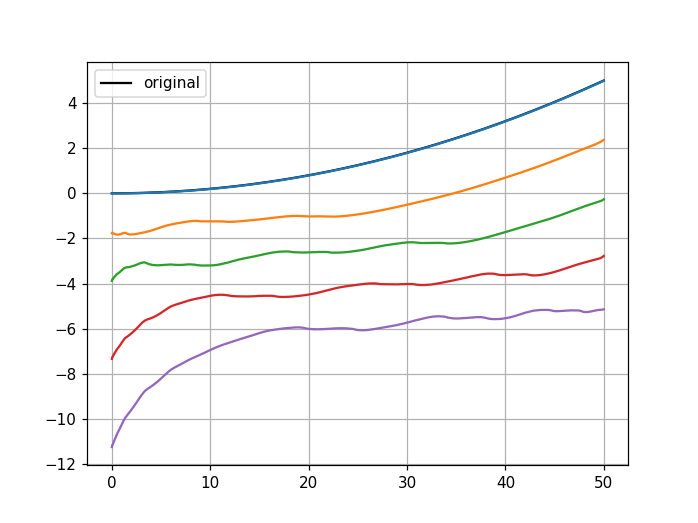

0.002


In [428]:
plt.figure()
xmax = 50
x = np.linspace(0,xmax,2000)
dx = x[1]-x[0]
nsteps = 5
alpha = 1/xmax**2*nsteps; print(alpha)
Nnext = x**2*alpha
plt.plot(x,Nnext,'k',label='original')
beta = .02
gamma = .25
nmax = 15
growth0 = 1
for i in range(1000):
    p = np.polyfit(x,Nnext,nmax); #print(p)
    N = np.polyval(p,x)
    dNdx = np.diff(N)/dx
    dNdx = np.append(dNdx,dNdx[-1])
    growth = -beta*np.abs(dNdx)**gamma
    Nnext += growth
    if(np.mod(i,200)==0):
        plt.plot(x,Nnext)
        #plt.plot(x,Nnext-300,'--')
plt.grid(True)
plt.legend()

In [434]:
# Now we need to do some kind of physical scaling
Nnext = Nnext-np.mean(Nnext)
Nnext = Nnext/np.max(Nnext)
print(np.std(Nnext))
Z2 = (np.diff(Nnext)/dx)**2
print(np.std(Z2))

1.077395709786645
0.11305344219572959


13.833333333333334


<IPython.core.display.Javascript object>


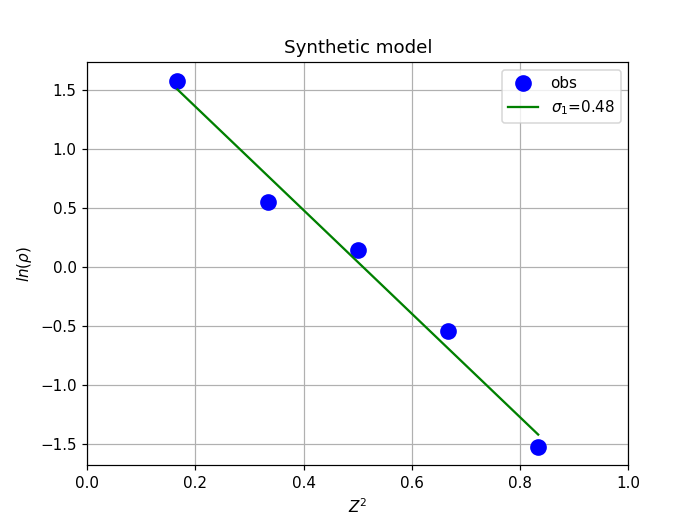

In [435]:
Z2minforhist = 0
Z2maxforhist = 1;
numforZ2hist = 5
Z2forhist = np.linspace(Z2minforhist,Z2maxforhist,numforZ2hist+2)[1:]
hist = np.histogram(Z2,bins=Z2forhist)
Z2bins = hist[1][0:-1]; #print(len(Z2bins))
hbins = hist[0]; #print(len(hbins)); #print(hbins)
norm = np.trapz(hbins,Z2bins); print(norm)
hbins = hbins/norm; #print(hbins)

ikeep = np.nonzero(hbins)
Z2keep = Z2bins[ikeep]; #print(Z2keep)
logrhoZ2 = np.log(hbins[ikeep]); #print(logrhoZ2)
plt.figure()
plt.plot(Z2keep,logrhoZ2,'ob',markersize=10, label='obs')

thisrange = [i for i in range(0,numforZ2hist)]
p1 = np.polyfit(Z2keep[thisrange],logrhoZ2[thisrange],1)
best_sigma1 = 1/np.sqrt(-p1[0])
label_sigma1 = '$\sigma_1$='+str(np.round(best_sigma1*100)/100) 
plt.plot(Z2keep,np.polyval(p1,Z2keep),'g', label=label_sigma1)

plt.grid(True)
plt.xlabel('$Z^2$')
plt.ylabel(r'$ln(\rho)$')
plt.title('Synthetic model')
plt.xlim([0,Z2maxforhist])
plt.legend()
